label: 3
Accel


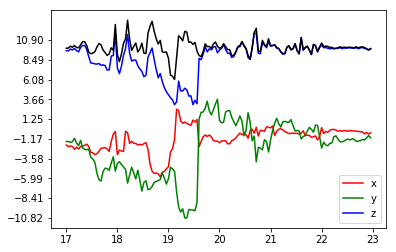

Gyro


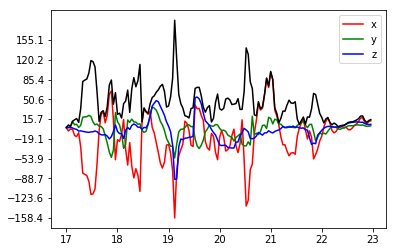

label: 5
Accel


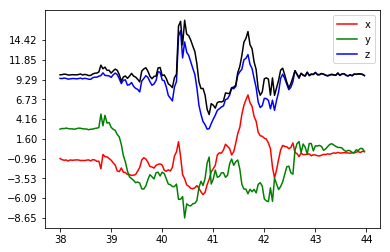

Gyro


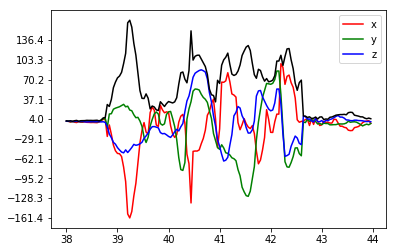

label: 0
Accel


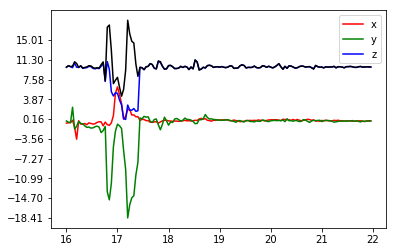

Gyro


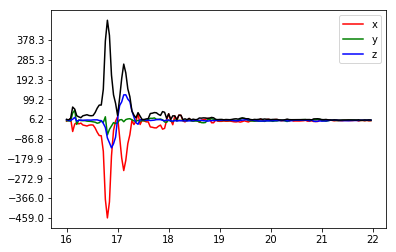

In [3]:
%matplotlib inline
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
with open("../drunkare-node/data.csv", 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    for line in csv_reader:
        T = [] 
        L = []

        # accelerometer
        X = []
        Y = []
        Z = []
        Accel = []

        # gyrometer
        X2 = []
        Y2 = []
        Z2 = []
        Gyro = []
        
        # print(len(line))
        m, d, H, M, S, label, = line[:6]
        if int(label) not in range(0,6):
            continue
        
        # accelerometer
        x = line[6:6+150]
        x = [float(d) for d in x]
        y = line[6+150:6+300]
        y = [float(d) for d in y]
        z = line[6+300:6+450]
        z = [float(d) for d in z]
        accel = [float(math.sqrt(x[i]**2+y[i]**2+z[i]**2)) for i in range(150)]
        
        # gyrometer
        x2 = line[6+450:6+600]
        x2 = [float(d) for d in x2]
        y2 = line[6+600:6+750]
        y2 = [float(d) for d in y2]
        z2 = line[6+750:6+900]
        z2 = [float(d) for d in z2]
        gyro = [float(math.sqrt(x2[i]**2+y2[i]**2+z2[i]**2)) for i in range(150)]
        
        start_time = float(S) # TO_FIX
        for i in range(150):
            T.append(start_time+0.040*i)
        
        L.append(int(label))
        X += x
        Y += y
        Z += z
        Accel += accel
        
        X2 += x2
        Y2 += y2
        Z2 += z2
        Gyro += gyro

        print("label: {}".format(L[0]))
        print("Accel")
        fig = plt.figure()
        min_ytick = min(min(X), min(Y), min(Z), min(Accel))
        max_ytick = max(max(X), max(Y), max(Z), max(Accel))
        plt.yticks(np.arange(min_ytick, max_ytick, (max_ytick-min_ytick) / 10))
        plot_x, = plt.plot(T , X, 'r', label = 'x')
        plot_y, = plt.plot(T , Y, 'g', label = 'y')
        plot_z, = plt.plot(T , Z, 'b', label = 'z')
        plot_accel = plt.plot(T, Accel, 'black', label = 'accel')
        plt.legend(handles=[plot_x, plot_y, plot_z])
        plt.show()

        print("Gyro")
        fig = plt.figure()
        min_ytick = min(min(X2), min(Y2), min(Z2), min(Gyro))
        max_ytick = max(max(X2), max(Y2), max(Z2), max(Gyro))
        plt.yticks(np.arange(min_ytick, max_ytick, (max_ytick-min_ytick) / 10))
        plot_x, = plt.plot(T , X2, 'r', label = 'x')
        plot_y, = plt.plot(T , Y2, 'g', label = 'y')
        plot_z, = plt.plot(T , Z2, 'b', label = 'z')
        plot_gyro = plt.plot(T, Gyro, 'black', label = 'gyro')
        plt.legend(handles=[plot_x, plot_y, plot_z])
        plt.show()